In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Read the CSV file
df = pd.read_csv(r"G:\My Drive\SIGNAL\data\padres_wui_analysis\svi_interactive_map2.csv")

# View the data types of the "FIPS" column
print(df["FIPS"].dtypes)

In [ ]:
df["FIPS"] = df["FIPS"].astype(str)


In [ ]:
df

In [ ]:

# Read the shapefile
shapefile_path = r"G:\My Drive\SIGNAL\data\padres_wui_analysis\tl_2020_06_tract\tl_2020_06_tract.shp"
gdf = gpd.read_file(shapefile_path)


In [ ]:
gdf.columns

In [ ]:
# Find the FIPS that match the column "ModGEOID"
matching_ModGEOID = gdf[gdf["ModGEOID"].isin(df["FIPS"])]

# Print the matching FIPS
print(matching_ModGEOID)




In [ ]:
matching_fips = df[df["FIPS"].isin(gdf["ModGEOID"])]
print(matching_fips)

In [ ]:
merged_gdf = gdf.merge(matching_fips, left_on='ModGEOID', right_on='FIPS', how='left')



In [ ]:
merged_gdf

In [ ]:
merged_gdf.to_file(r"G:\My Drive\SIGNAL\data\padres_wui_analysis\svi.shp", driver='ESRI Shapefile')


In [2]:
file_path = "G:/My Drive/SIGNAL/data/padres_wui_analysis/svi_padres_wui/svi_padres_wui.shp"
data = gpd.read_file(file_path)

In [8]:
print(data.columns)


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER',
       ...
       'MP_AIAN', 'EP_NHPI', 'MP_NHPI', 'EP_TWOMORE', 'MP_TWOMORE',
       'EP_OTHERRA', 'MP_OTHERRA', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=176)


In [10]:
columns_to_sum = [
    "E_TOTPOP", "E_HU", "E_HH", "E_POV150", "E_UNEMP", "E_AGE65", "E_AGE17", 
    "E_DISABL", "E_SNGPNT", "E_MINRTY", "E_MUNIT", "E_MOBILE", "E_CROWD", 
    "E_NOVEH", "E_GROUPQ", "RPL_THEME1", "RPL_THEME2", "RPL_THEME3", 
    "RPL_THEME4", "RPL_THEMES", "E_DAYPOP", "E_NOINT", "E_AFAM", "E_HISP", 
    "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRAC"
]

sums = data[columns_to_sum].sum()


In [11]:
sums

E_TOTPOP      151916.0000
E_HU           62600.0000
E_HH           52015.0000
E_POV150       23471.0000
E_UNEMP         3681.0000
E_AGE65        31908.0000
E_AGE17        30564.0000
E_DISABL       16845.0000
E_SNGPNT        1901.0000
E_MINRTY       63840.0000
E_MUNIT         1864.0000
E_MOBILE        6400.0000
E_CROWD         2768.0000
E_NOVEH         1593.0000
E_GROUPQ        9679.0000
RPL_THEME1        16.6791
RPL_THEME2        17.7481
RPL_THEME3        10.5013
RPL_THEME4        18.9566
RPL_THEMES        16.3302
E_DAYPOP      129023.0000
E_NOINT        14177.0000
E_AFAM          1607.0000
E_HISP         52371.0000
E_ASIAN         4942.0000
E_AIAN           469.0000
E_NHPI           171.0000
E_TWOMORE       4137.0000
E_OTHERRAC       143.0000
dtype: float64

In [12]:
sums_table = pd.DataFrame(sums, columns=['Sum'])
print(sums_table)

                    Sum
E_TOTPOP    151916.0000
E_HU         62600.0000
E_HH         52015.0000
E_POV150     23471.0000
E_UNEMP       3681.0000
E_AGE65      31908.0000
E_AGE17      30564.0000
E_DISABL     16845.0000
E_SNGPNT      1901.0000
E_MINRTY     63840.0000
E_MUNIT       1864.0000
E_MOBILE      6400.0000
E_CROWD       2768.0000
E_NOVEH       1593.0000
E_GROUPQ      9679.0000
RPL_THEME1      16.6791
RPL_THEME2      17.7481
RPL_THEME3      10.5013
RPL_THEME4      18.9566
RPL_THEMES      16.3302
E_DAYPOP    129023.0000
E_NOINT      14177.0000
E_AFAM        1607.0000
E_HISP       52371.0000
E_ASIAN       4942.0000
E_AIAN         469.0000
E_NHPI         171.0000
E_TWOMORE     4137.0000
E_OTHERRAC     143.0000


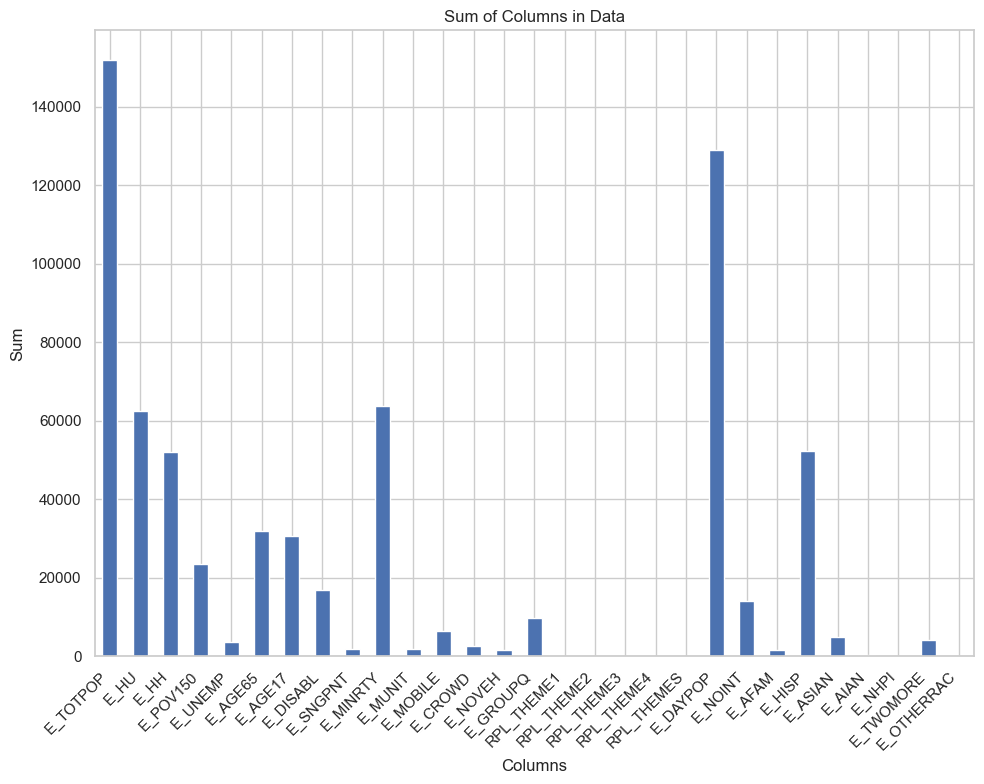

In [13]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 8))
sums.plot(kind='bar')
plt.title('Sum of Columns in Data')
plt.ylabel('Sum')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
variables_descriptions = {
    "2020 VARIABLE NAME": [
        "E_TOTPOP", "E_HU", "E_HH", "E_POV150", "E_UNEMP", "E_AGE65", "E_AGE17", 
        "E_DISABL", "E_SNGPNT", "E_MINRTY", "E_MUNIT", "E_MOBILE", "E_CROWD", 
        "E_NOVEH", "E_GROUPQ", "RPL_THEME1", "RPL_THEME2", "RPL_THEME3", 
        "RPL_THEME4", "RPL_THEMES", "E_DAYPOP", "E_NOINT", "E_AFAM", "E_HISP", 
        "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRACE"
    ],
    "2020 DESCRIPTION": [
        "Population estimate, 2016- 2020 ACS", "Housing units estimate, 2016- 2020 ACS", 
        "Households estimate, 2016- 2020 ACS", "Persons below 150% poverty estimate, 2016- 2020 ACS", 
        "Civilian (age 16+) unemployed estimate, 2016- 2020 ACS", "Persons aged 65 and older estimate, 2016-2020 ACS", 
        "Persons aged 17 and younger estimate, 2016- 2020 ACS", "Civilian noninstitutionalized population with a disability estimate, 2016-2020 ACS",
        "Single-parent household with children under 18 estimate, 2016- 2020 ACS", "Minority (Hispanic or Latino (of any race); Black and African American, Not Hispanic or Latino; American Indian and Alaska Native, Not Hispanic or Latino; Asian, Not Hispanic or Latino; Native Hawaiian and Other Pacific Islander, Not Hispanic or Latino; Two or More Races, Not Hispanic or Latino; Other Races, Not Hispanic or Latino) estimate, 2016-2020 ACS",
        "Housing in structures with 10 or more units estimate, 2016- 2020 ACS", "Mobile homes estimate, 2016- 2020 ACS",
        "At household level (occupied housing units), more people than rooms estimate, 2016- 2020 ACS", "Households with no vehicle available estimate, 2016- 2020 ACS",
        "Persons in group quarters estimate, 2016-2020 ACS", "Percentile ranking for Socioeconomic Status theme summary",
        "Percentile ranking for Household Characteristics theme summary", "Percentile ranking for Racial and Ethnic Minority Status theme",
        "Percentile ranking for Housing Type/ Transportation theme", "Overall percentile ranking",
        "Adjunct variable - Estimated daytime population, LandScan 2020", "Adjunct variable - Households without a computer with a broadband Internet subscription estimate, 2016- 2020 ACS",
        "Adjunct variable - Black/African American, not Hispanic or Latino persons estimate, 2016-2020 ACS", "Adjunct variable – Hispanic or Latino persons estimate, 2016-2020 ACS",
        "Adjunct variable – Asian, not Hispanic or Latino persons estimate, 2016- 2020 ACS", "Adjunct variable - American Indian or Alaska Native, not Hispanic or Latino",
        "Adjunct variable - Native Hawaiian or Other Pacific Islander, not Hispanic or Latino persons estimate, 2016-2020 ACS", "Adjunct variable - Two or more races, not Hispanic or Latino persons estimate, 2016- 2020 ACS",
        "Adjunct variable - Some other race, not Hispanic or Latino persons"
        ],
        "CENSUS or SVI TABLE(S)": [
        "S0601", "DP04", "DP02", "S1701", "DP03", "S0101", "B09001",
        "DP02", "B11012", "DP05", "DP04", "DP04", "DP04",
        "DP04", "B26001", "SVI", "SVI", "SVI",
        "SVI", "SVI", "", "S2802", "DP05", "DP05",
        "DP05", "DP05", "DP05", "DP05", "DP05"
        ]
        }

df = pd.DataFrame(variables_descriptions)

In [15]:
df

,2020 VARIABLE NAME,2020 DESCRIPTION,CENSUS or SVI TABLE(S)
0,E_TOTPOP,"Population estimate, 2016- 2020 ACS",S0601
1,E_HU,"Housing units estimate, 2016- 2020 ACS",DP04
2,E_HH,"Households estimate, 2016- 2020 ACS",DP02
3,E_POV150,"Persons below 150% poverty estimate, 2016- 202...",S1701
4,E_UNEMP,"Civilian (age 16+) unemployed estimate, 2016- ...",DP03
5,E_AGE65,"Persons aged 65 and older estimate, 2016-2020 ACS",S0101
6,E_AGE17,"Persons aged 17 and younger estimate, 2016- 20...",B09001
7,E_DISABL,Civilian noninstitutionalized population with ...,DP02
8,E_SNGPNT,Single-parent household with children under 18...,B11012
9,E_MINRTY,Minority (Hispanic or Latino (of any race); Bl...,DP05


In [17]:
grouped_columns = {
    "Demographic and Socioeconomic": ["E_TOTPOP", "E_AGE65", "E_AGE17", "E_POV150", "E_UNEMP", "E_NOINT", "E_MINRTY", "E_AFAM", "E_HISP", "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRAC"],
    "Housing and Household": ["E_HU", "E_MUNIT", "E_MOBILE", "E_HH", "E_SNGPNT", "E_NOVEH", "E_CROWD", "E_GROUPQ"],
    "Health and Disability": ["E_DISABL"],
    "RPL Variables": ["RPL_THEME1", "RPL_THEME2", "RPL_THEME3", "RPL_THEME4", "RPL_THEMES"],
    "Adjunct Variables": ["E_DAYPOP"]
}

group_sums = {group: data[columns].sum() for group, columns in grouped_columns.items()}


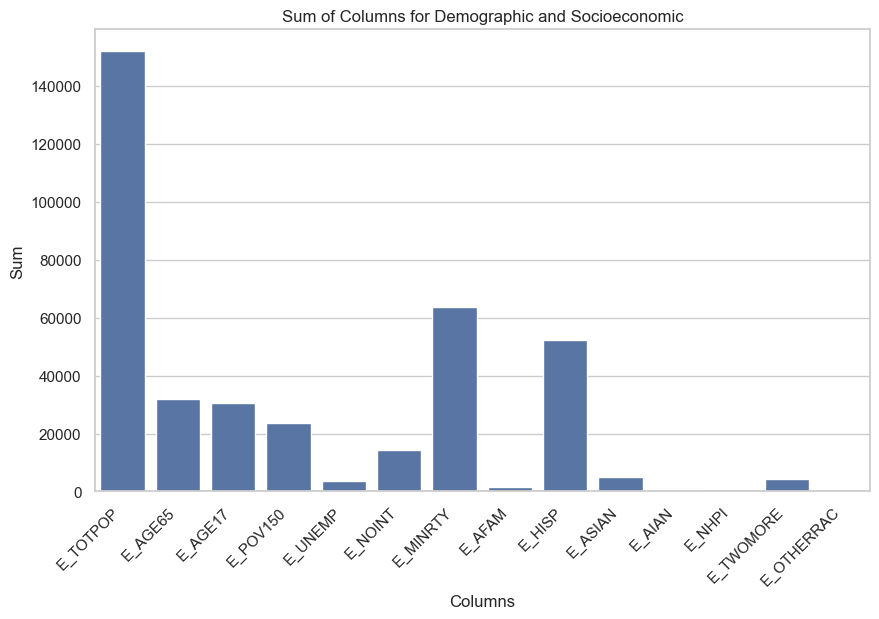

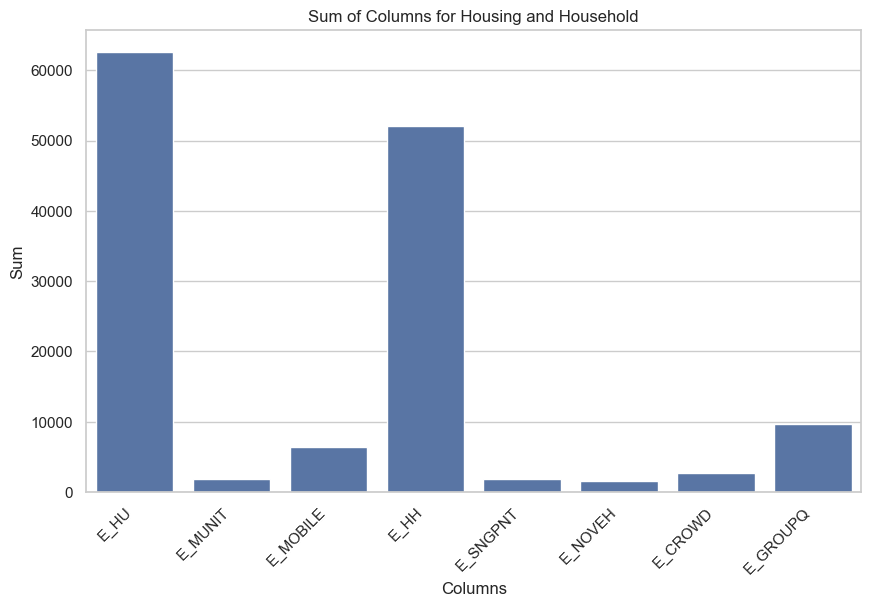

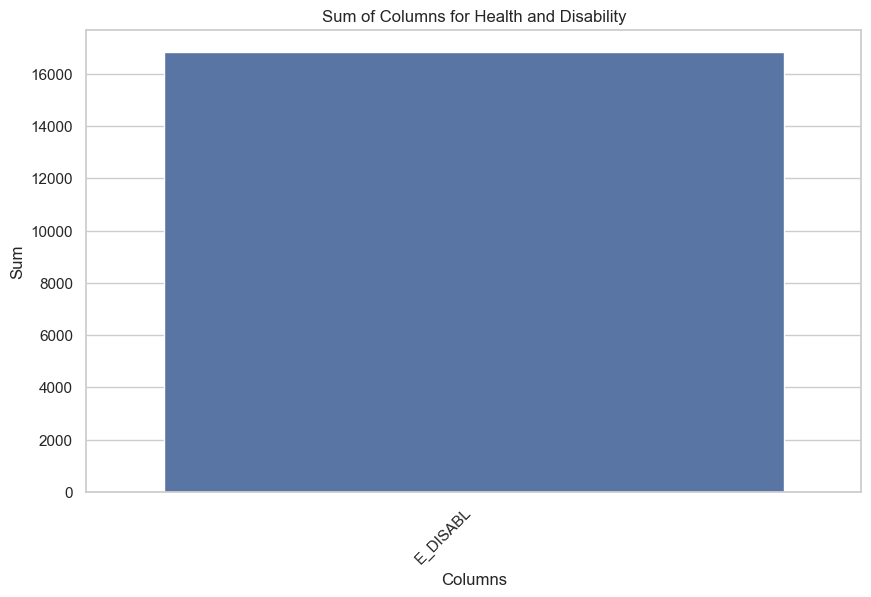

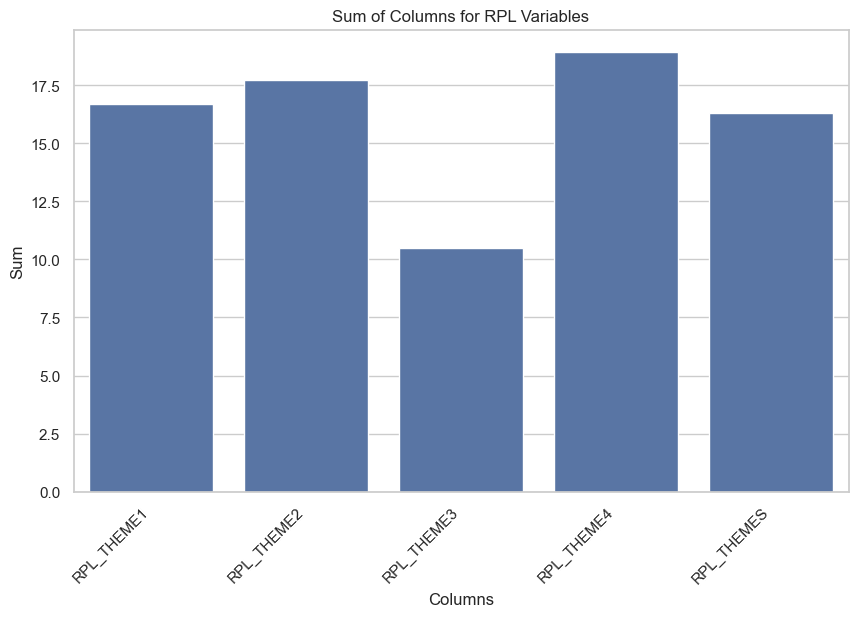

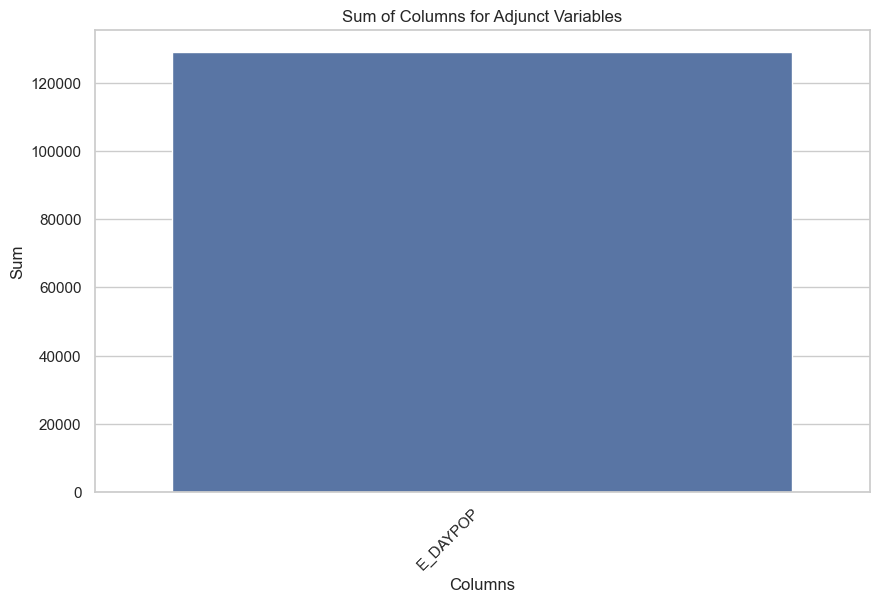

In [18]:
for group, sums in group_sums.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sums.index, y=sums.values)
    plt.title(f'Sum of Columns for {group}')
    plt.ylabel('Sum')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [24]:
# Reshape data for FacetGrid
long_format = pd.DataFrame(columns=["Group", "Variable", "Sum"])
for group, sums in group_sums.items():
    for variable, sum_value in sums.items():
        long_format = long_format.append({"Group": group, "Variable": variable, "Sum": sum_value}, ignore_index=True)

# Create FacetGrid
g = sns.FacetGrid(long_format, col="Group", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.barplot, "Variable", "Sum")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'append'